In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

In [43]:
data = pd.read_excel('gulf.xlsx')

In [44]:
data

,Date,Prior,Open,High,Low,Close,P/E,PEG,P/BV
0,2019-01-01,16.12,16.02,17.25,15.77,17.20,53.69,1.57,5.13
1,2019-02-01,17.20,17.15,18.59,16.96,17.90,63.76,-5.20,5.28
2,2019-03-01,17.90,17.90,19.28,17.30,18.88,67.28,-5.49,5.58
3,2019-04-01,18.88,18.93,20.96,18.93,20.66,73.62,-6.00,6.10
4,2019-05-01,20.66,20.56,21.36,18.88,20.37,84.09,-2.37,5.83
5,2019-06-01,20.37,20.47,24.62,20.47,24.32,100.42,-2.83,6.96
6,2019-07-01,24.32,24.62,26.60,23.43,25.01,103.27,-2.91,7.16
7,2019-08-01,25.01,24.92,29.07,23.04,28.67,66.46,1.13,8.41
8,2019-09-01,28.67,28.47,32.33,28.47,31.64,73.33,1.24,9.28
9,2019-10-01,31.64,31.74,35.49,30.25,32.03,74.25,1.26,9.40


In [49]:
df =data[['Date','Close','P/E','P/BV']]

In [50]:
df

,Date,Close,P/E,P/BV
0,2019-01-01,17.20,53.69,5.13
1,2019-02-01,17.90,63.76,5.28
2,2019-03-01,18.88,67.28,5.58
3,2019-04-01,20.66,73.62,6.10
4,2019-05-01,20.37,84.09,5.83
5,2019-06-01,24.32,100.42,6.96
6,2019-07-01,25.01,103.27,7.16
7,2019-08-01,28.67,66.46,8.41
8,2019-09-01,31.64,73.33,9.28
9,2019-10-01,32.03,74.25,9.40


In [51]:
df=df.set_index('Date')

In [52]:
df['Return']=df.Close.pct_change()

In [53]:
df

,Close,P/E,P/BV,Return
Date,,,,
2019-01-01,17.20,53.69,5.13,NaN
2019-02-01,17.90,63.76,5.28,0.040698
2019-03-01,18.88,67.28,5.58,0.054749
2019-04-01,20.66,73.62,6.10,0.094280
2019-05-01,20.37,84.09,5.83,-0.014037
2019-06-01,24.32,100.42,6.96,0.193913
2019-07-01,25.01,103.27,7.16,0.028372
2019-08-01,28.67,66.46,8.41,0.146341
2019-09-01,31.64,73.33,9.28,0.103593


In [83]:
df

,Close,P/E,P/BV,Return
Date,,,,
2019-01-01,17.20,53.69,5.13,NaN
2019-02-01,17.90,63.76,5.28,0.040698
2019-03-01,18.88,67.28,5.58,0.054749
2019-04-01,20.66,73.62,6.10,0.094280
2019-05-01,20.37,84.09,5.83,-0.014037
2019-06-01,24.32,100.42,6.96,0.193913
2019-07-01,25.01,103.27,7.16,0.028372
2019-08-01,28.67,66.46,8.41,0.146341
2019-09-01,31.64,73.33,9.28,0.103593


In [63]:
X=df.iloc[1:,1:3]
y=df.iloc[1:,-1]


In [64]:
X.head()

,P/E,P/BV
Date,,
2019-02-01,63.76,5.28
2019-03-01,67.28,5.58
2019-04-01,73.62,6.10
2019-05-01,84.09,5.83
2019-06-01,100.42,6.96


In [65]:
y.tail()

Date
2021-06-01    0.014815
2021-07-01   -0.021898
2021-08-01    0.246269
2021-09-01   -0.005988
2021-10-01    0.030120
Name: Return, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [67]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [68]:
X_train

,P/E,P/BV
Date,,
2020-06-01,126.60,16.00
2021-05-01,62.58,5.63
2021-07-01,62.12,5.59
2020-11-01,122.85,7.03
2019-12-01,78.09,9.37
2019-06-01,100.42,6.96
2019-08-01,66.46,8.41
2019-05-01,84.09,5.83
2021-02-01,91.11,6.09


In [69]:
X_test

,P/E,P/BV
Date,,
2021-09-01,83.19,7.04
2020-04-01,84.58,10.76
2021-01-01,117.59,6.73
2019-11-01,78.56,9.43
2021-03-01,91.79,6.14
2020-10-01,96.70,13.50
2019-02-01,63.76,5.28
2020-09-01,103.48,14.45
2020-02-01,72.25,9.19


In [70]:
X_train.isnull(). sum()

P/E     0
P/BV    0
dtype: int64

In [71]:
y_train.isnull(). sum()

0

In [75]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [76]:
y_pred = reg.predict(X_test)

In [77]:
print('Scpre =',metrics.r2_score(y_test,y_pred))

Scpre = -0.12893406746656577


In [78]:
m=reg.coef_
b=reg.intercept_

In [79]:
m

array([ 0.00106618, -0.01201099])

In [80]:
b

0.04852543887732066

# let try logistic regression but first label encoding

In [84]:
df

,Close,P/E,P/BV,Return
Date,,,,
2019-01-01,17.20,53.69,5.13,NaN
2019-02-01,17.90,63.76,5.28,0.040698
2019-03-01,18.88,67.28,5.58,0.054749
2019-04-01,20.66,73.62,6.10,0.094280
2019-05-01,20.37,84.09,5.83,-0.014037
2019-06-01,24.32,100.42,6.96,0.193913
2019-07-01,25.01,103.27,7.16,0.028372
2019-08-01,28.67,66.46,8.41,0.146341
2019-09-01,31.64,73.33,9.28,0.103593


In [87]:

df.loc[df['Return']>0,'Return_type']=1
df.loc[df['Return']<0,'Return_type']= -1


In [91]:
df.dropna(inplace=True)
df

,Close,P/E,P/BV,Return,Return_type
Date,,,,,
2019-02-01,17.90,63.76,5.28,0.040698,1.0
2019-03-01,18.88,67.28,5.58,0.054749,1.0
2019-04-01,20.66,73.62,6.10,0.094280,1.0
2019-05-01,20.37,84.09,5.83,-0.014037,-1.0
2019-06-01,24.32,100.42,6.96,0.193913,1.0
2019-07-01,25.01,103.27,7.16,0.028372,1.0
2019-08-01,28.67,66.46,8.41,0.146341,1.0
2019-09-01,31.64,73.33,9.28,0.103593,1.0
2019-10-01,32.03,74.25,9.40,0.012326,1.0


In [94]:
X=df.iloc[:,1:4]
y=df.iloc[:,-1]

In [95]:
from sklearn.linear_model import LogisticRegression

In [97]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [99]:
logreg.predict_proba(X_test)
# watch prob

array([[0.39071605, 0.60928395],
       [0.3154225 , 0.6845775 ],
       [0.36549638, 0.63450362],
       [0.55787349, 0.44212651],
       [0.38794809, 0.61205191],
       [0.55021788, 0.44978212],
       [0.32934919, 0.67065081],
       [0.4133488 , 0.5866512 ],
       [0.59325393, 0.40674607],
       [0.80550735, 0.19449265]])

In [100]:
X_test

,P/E,P/BV,Return
Date,,,
2020-11-01,122.85,7.03,0.228070
2019-02-01,63.76,5.28,0.040698
2021-02-01,91.11,6.09,-0.007463
2020-02-01,72.25,9.19,-0.140042
2021-08-01,83.69,7.08,0.246269
2019-11-01,78.56,9.43,0.030909
2019-03-01,67.28,5.58,0.054749
2020-12-01,120.22,6.88,-0.021429
2020-04-01,84.58,10.76,0.291639


In [101]:
y_pred = logreg.predict(X_test)

In [102]:
y_pred

array([ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.])

In [103]:
compare = pd.DataFrame(logreg.predict_proba(X_test))
compare['y_pred']=y_pred
compare

,0,1,y_pred
0,0.390716,0.609284,1.0
1,0.315422,0.684578,1.0
2,0.365496,0.634504,1.0
3,0.557873,0.442127,-1.0
4,0.387948,0.612052,1.0
5,0.550218,0.449782,-1.0
6,0.329349,0.670651,1.0
7,0.413349,0.586651,1.0
8,0.593254,0.406746,-1.0
9,0.805507,0.194493,-1.0


In [104]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2, 2],
       [2, 4]])

Text(0.5, 23.52222222222222, 'Predicted')

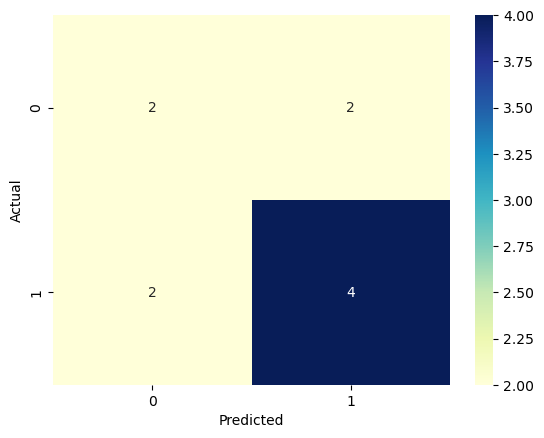

In [106]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [107]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666


In [108]:
df_report = pd.DataFrame({'Actually':y_test,'Predicted':y_pred})

In [109]:
df_report

,Actually,Predicted
Date,,
2020-11-01,1.0,1.0
2019-02-01,1.0,1.0
2021-02-01,-1.0,1.0
2020-02-01,-1.0,-1.0
2021-08-01,1.0,1.0
2019-11-01,1.0,-1.0
2019-03-01,1.0,1.0
2020-12-01,-1.0,1.0
2020-04-01,1.0,-1.0


In [110]:
print('F1:',metrics.f1_score(y_test,y_pred))
# is mean this model accurate 66%

F1: 0.6666666666666666


In [ ]:
# must work more like label encoding pe range 
# and p/bv range 